# **Online Purchase Intention - Data Cleaning**

working with a survey dataset that includes:

1. **Demographic information**: Gender, Age, Education level, Marital Status, Professional Background
2. **Online shopping behavior**: E-commerce platforms used (like daraz.lk, kapruka.com, ikman.lk)
3. **Types of online stores**: General e-commerce, specialty stores, online pharmacies, fashion retailers, grocery delivery
4. **User agreement measurements**: Multiple Likert scale   questions measuring agreement with statements about:
    - Ease of navigation on platforms
    - Platform responsiveness
    - Reliability of products
    - Security and privacy concerns
    - Convenience during crisis periods
  
The survey appears to have approximately 836 respondents based on the data snippets, with variables measuring various aspects of online shopping behavior and attitudes.

### **Import Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import openpyxl
import os
import sys
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
df = pd.read_excel('../../data/raw/In22-CS3121-Project Dataset.xlsx', engine='openpyxl')
df.head()

,Timestamp,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Please indicate your level of agreement with the following statements. [Sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"Please indicate your level of agreement with the following statements. [Overall, I have a positive attitude toward online shopping during a crisis.]",Please indicate your level of agreement with the following statements. [I believe that online shopping is a practical and efficient way to make purchases during a crisis.],Please indicate your level of agreement with the following statements. [I am concerned about the security of my personal and financial information when shopping online during a crisis.],Please indicate your level of agreement with the following statements. [I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],Have you made online purchases during crisis time?,"Please indicate your level of agreement with the following statements. [Overall, I am satisfied with online purchase during a crisis?]",Please indicate your level of agreement with the following statements. [I Have changed my online shopping behavior during a crisis compared to non-crisis periods?],Please indicate your level of agreement with the following statements. [It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],Please indicate your level of agreement with the following statements. [I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
0,2023-08-02 23:59:11.684000,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,NaN,...,Disagree,Neutral,Neutral,Neutral,Neutral,Yes,Neutral,Neutral,Disagree,Neutral
1,2023-08-03 00:04:13.800000,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, ikman.lk",patpat.lk,"epharma.lk, onlinepharmacy.lk",...,Agree,Neutral,Agree,Neutral,Agree,Yes,Agree,Agree,Agree,Agree
2,2023-08-03 00:15:31.602000,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, kapruka.com, ikman.lk,","patpat.lk, riyasewana.lk","healthgurd.lk, onlinepharmacy.lk",...,Neutral,Agree,Strongly agree,Agree,Agree,Yes,Agree,Strongly agree,Strongly agree,Agree
3,2023-08-03 00:20:49.096000,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",lankavechicle.com,onlinepharmacy.lk,...,Agree,Neutral,Agree,Neutral,Agree,Yes,Agree,Agree,Agree,Agree
4,2023-08-03 00:23:52.006000,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"daraz.lk, wow.lk",riyasewana.lk,"epharma.lk, ceymed.lk",...,Agree,Agree,Agree,Agree,Neutral,Yes,Agree,Agree,Agree,Neutral


In [34]:
non_users = df[df["Have used online shopping platforms before "] == "No"]
non_users

,Timestamp,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Please indicate your level of agreement with the following statements. [Sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"Please indicate your level of agreement with the following statements. [Overall, I have a positive attitude toward online shopping during a crisis.]",Please indicate your level of agreement with the following statements. [I believe that online shopping is a practical and efficient way to make purchases during a crisis.],Please indicate your level of agreement with the following statements. [I am concerned about the security of my personal and financial information when shopping online during a crisis.],Please indicate your level of agreement with the following statements. [I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],Have you made online purchases during crisis time?,"Please indicate your level of agreement with the following statements. [Overall, I am satisfied with online purchase during a crisis?]",Please indicate your level of agreement with the following statements. [I Have changed my online shopping behavior during a crisis compared to non-crisis periods?],Please indicate your level of agreement with the following statements. [It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],Please indicate your level of agreement with the following statements. [I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
115,2023-08-11 06:39:17.444000,Male,25 - 35,High school,Single,No,Student,daraz.lk,patpat.lk,onlinepharmacy.lk,...,Neutral,Neutral,Neutral,Strongly agree,Neutral,No,Strongly agree,Neutral,Neutral,Neutral
293,2023-11-13 06:37:57.711000,Male,18 - 25,School,Single,No,Student,daraz.lk,riyasewana.lk,onlinepharmacy.lk,...,Agree,Neutral,Agree,Agree,Agree,No,Strongly agree,Agree,Agree,Agree
413,2023-11-14 21:28:26.119000,Male,25 - 35,Bachelor's Degree,Married,No,Employed (full-time),NaN,riyasewana.lk,NaN,...,Neutral,Agree,Neutral,Neutral,Neutral,No,Disagree,Neutral,Strongly agree,Neutral


### **Basic Data Analysis**

In [3]:
def basic_analysis_factory(df):
    print("========== BASIC DATAFRAME ANALYSIS ==========\n")

    # 1. Info
    print("1. DataFrame Info:")
    print("-" * 40)
    df.info()
    print("\n")

    # 2. Columns
    print("2. Column Names:")
    print("-" * 40)
    print(df.columns.tolist())
    print("\n")

    # 3. Data Types
    print("3. Data Types:")
    print("-" * 40)
    print(df.dtypes)
    print("\n")

    # 4. Missing Values
    print("4. Missing Values Summary:")
    print("-" * 40)
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_percent
    })
    print(missing_df[missing_df['Missing Values'] > 0])
    
    # Plot missing values
    if missing_df['Missing Values'].sum() > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_df.index, y=missing_df['Missing Values'])
        plt.xticks(rotation=90)
        plt.title('Missing Values per Column')
        plt.ylabel('Count')
        plt.xlabel('Column')
        plt.tight_layout()
        plt.show()
    print("\n")

    # 5. Duplicate Rows
    print("5. Duplicate Rows:")
    print("-" * 40)
    dup_count = df.duplicated().sum()
    print(f"Total Duplicated Rows: {dup_count}")
    if dup_count > 0:
        print(df[df.duplicated()].head())
    print("\n")

    # 6. Describe (Numerical)
    print("6. Describe - Numerical Data:")
    print("-" * 40)
    print(df.describe())
    print("\n")

    # 7. Describe (Object / Categorical)
    print("7. Describe - Object (Categorical) Data:")
    print("-" * 40)
    print(df.describe(include=['object']))
    print("\n")

    # 8. Unique values per column
    print("8. Unique Values Per Column:")
    print("-" * 40)
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values")
    print("\n")

    print("========== END OF ANALYSIS ==========")

========== BASIC DATAFRAME ANALYSIS ==========

1. DataFrame Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 59 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                                                                               836 non-null    object
 1   Gender                                                                                            

C:\Users\npafe\AppData\Local\Temp\ipykernel_13240\534794335.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


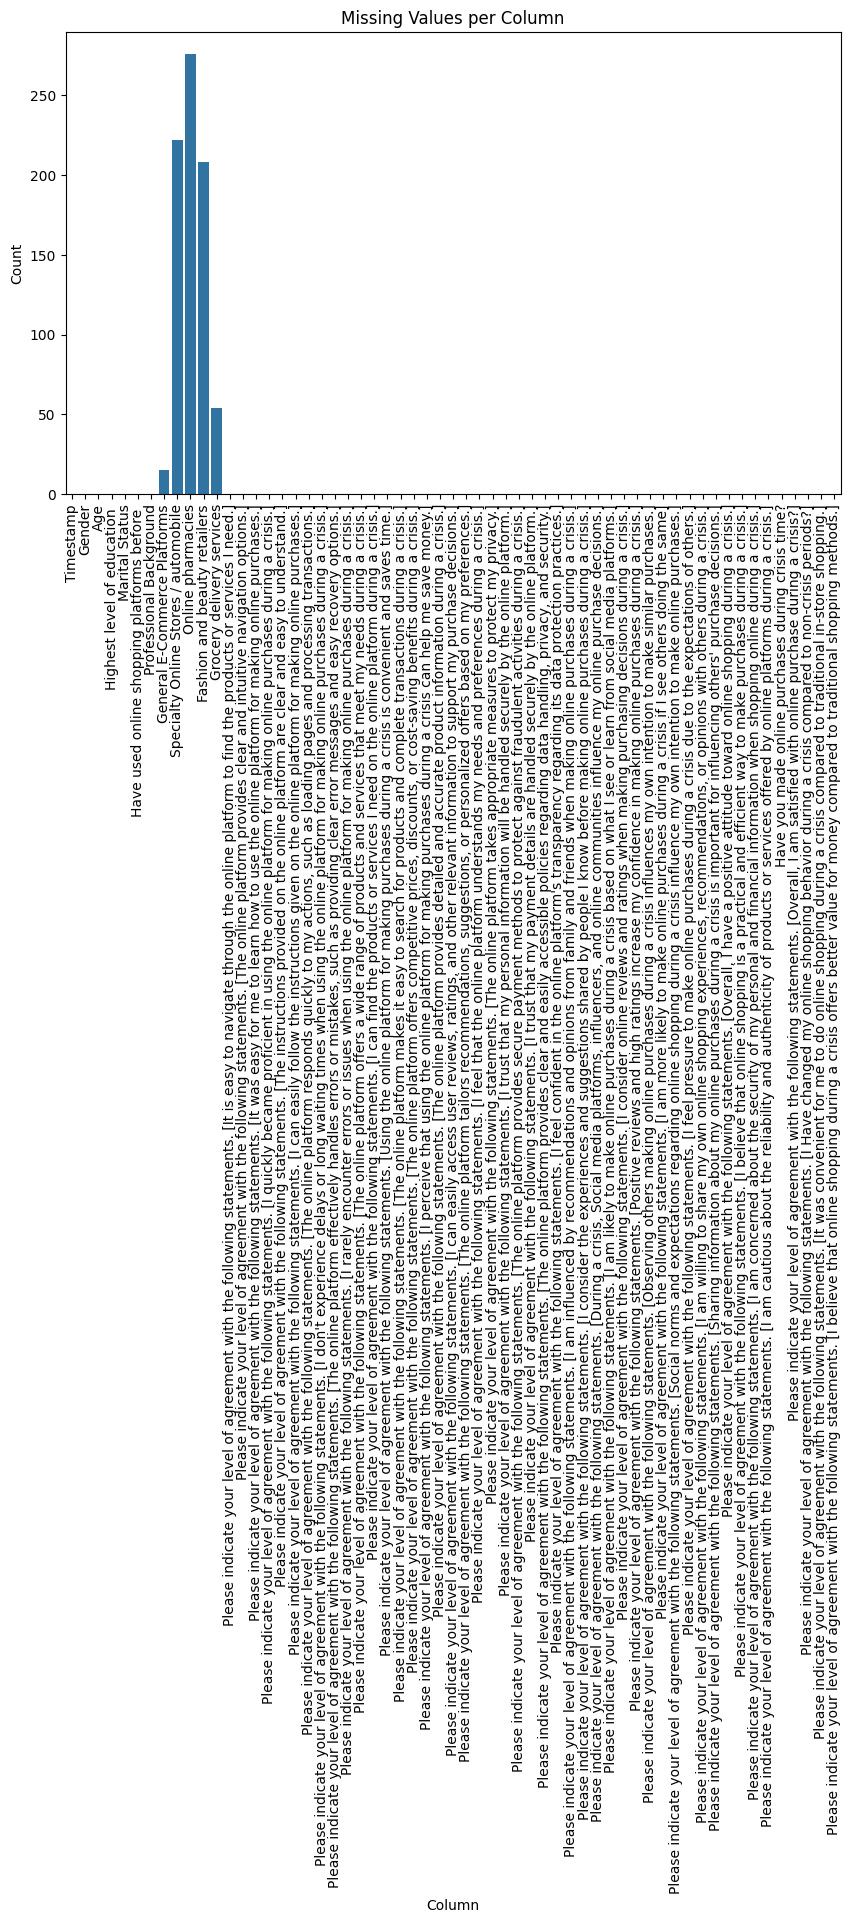



5. Duplicate Rows:
----------------------------------------
Total Duplicated Rows: 11
               Timestamp  Gender      Age Highest level of education   \
622  2024-10-13 00:15:05  Female  25 - 35           Bachelor's Degree   
648  2024-10-13 00:34:22    Male  25 - 35           Bachelor's Degree   
655  2024-10-13 00:43:29  Female  25 - 35           Bachelor's Degree   
667  2024-10-13 00:43:35  Female  25 - 35           Bachelor's Degree   
736  2024-10-13 17:52:35  Female  25 - 35           Bachelor's Degree   

    Marital Status Have used online shopping platforms before   \
622        Married                                         Yes   
648         Single                                         Yes   
655        Married                                         Yes   
667        Married                                         Yes   
736         Single                                         Yes   

    Professional Background             General E-Commerce Platforms  \
622 

In [4]:
basic_analysis_factory(df)



### **Missing Value Strategy**

In survey-based research, especially when dealing with multi-response categorical data, handling missing values requires both contextual awareness and methodological rigor. For this study, a tailored imputation strategy was employed to address missing entries in the section related to online shopping platform usage.

Specifically, respondents were asked whether they had previously used online shopping platforms. Based on their responses, missing values in five specific platform-related columns were treated differently:

1. **For respondents who indicated they *have not* used online shopping platforms**, missing values were replaced with the label `"None"`—signifying that the non-response aligns with a genuine absence of platform use.

2. **For respondents who *have* used online shopping platforms but did not specify which platforms**, missing values were filled with an empty string `""`. This maintains the distinction between *not using any platform* and *failing to specify used platforms*.

This context-aware imputation was implemented as follows:

* A composite indicator was created to identify whether a participant used *any* of the five specified platform types.
* Respondent answers to the question *“Have used online shopping platforms before”* were used to segment the data.
* Missing values were imputed with either `"None"` or `""` depending on the logical intersection of these two criteria.

---

### Benefits of This Approach

1. **Semantic Accuracy**
   This strategy respects the semantic meaning of the data. It differentiates between non-users and unspecified users, avoiding misrepresentation of user behavior.

2. **Preservation of Informational Integrity**
   By not introducing artificial or assumed values (e.g., mode imputation), the method preserves the original distribution and intention behind the responses.

3. **Compatibility with Multi-Label Encoding**
   The approach aligns seamlessly with downstream processing steps like multi-label binarization. "None" entries are correctly encoded as zero across all platform labels, while empty strings enable flexible encoding without adding noise.

4. **Statistical Soundness**
   This method avoids introducing systematic bias, thereby maintaining the integrity of subsequent statistical analyses such as clustering, classification, or inferential modeling.

5. **Improved Interpretability**
   By keeping imputation context-specific and transparent, the resulting dataset remains easier to interpret both descriptively and analytically.

---

This strategy exemplifies best practices in survey data preprocessing, especially when dealing with categorical, non-numeric variables prone to partial or inconsistent responses.





In [5]:
# 1. Create a comprehensive "platforms used" indicator
has_used_any_platform = df[["General E-Commerce Platforms", 
                           "Specialty Online Stores / automobile",
                           "Online pharmacies", 
                           "Fashion and beauty retailers",
                           "Grocery delivery services"]].notna().any(axis=1)

# 2. Cross-reference with the "Have used online shopping platforms before" column
has_used_online = df["Have used online shopping platforms before "] == "Yes"

# 3. Custom imputation strategy
for col in ["General E-Commerce Platforms", 
           "Specialty Online Stores / automobile",
           "Online pharmacies", 
           "Fashion and beauty retailers",
           "Grocery delivery services"]:
    
    # For those who say they've never used online shopping, fill with "None"
    df.loc[~has_used_online & df[col].isna(), col] = "None"
    
    # For those who claim to have used platforms but didn't specify which ones
    # We can use a special placeholder or most common value
    # Option 1: Use empty string (recommended for multi-label binarization)
    df.loc[has_used_online & df[col].isna(), col] = ""
    
    # Option 2 (alternative): Impute with most common platform in that category
    # mode_value = df[col].mode()[0]
    # df.loc[has_used_online & df[col].isna(), col] = mode_value

### **Here The Encoding Strategies good for use**




#### **1. Gender**
- Unique Values: `'Male'`, `'Female'`, `'Prefer not to say'`
- **Best Encoding**:  
  → **Label Encoding** *(Male = 0, Female = 1, Prefer not to say = 2)* if model is tree-based (e.g., Random Forest).  
  → **One-Hot Encoding** if using linear models (e.g., Logistic Regression).



#### **2. Age**
- Unique Ranges: `'18-25'`, `'25-35'`, `'35-45'`, `'45-55'`
- **Best Encoding**:  
  → **Ordinal Encoding** (18–25 = 0, 25–35 = 1, etc.) — because age has a **natural order**.



#### **3. Highest Level of Education**
- Examples: Bachelor's, Master's, Diploma, Grade 8 pass, etc.
- **Best Encoding**:  
  → **Ordinal Encoding** (assign rank based on education level, e.g., High School < Bachelor < Master).  
  (We can define a custom order like: Grade 8 → High School → Diploma → Bachelor's → Postgraduate → Master's+)



#### **4. Marital Status**
- Values: `'Single'`, `'Married'`
- **Best Encoding**:  
  → **Binary Encoding** (Single = 0, Married = 1).



#### **5. Have used online shopping platforms before**
- Values: `'Yes'`, `'No'`
- **Best Encoding**:  
  → **Binary Encoding** (Yes = 1, No = 0).



#### **6. Professional Background**
- Values: Employed full-time, Student, Jobless, etc.
- **Best Encoding**:  
  → **One-Hot Encoding** — no clear order among jobs.



#### **7. General E-Commerce Platforms**
- Multiple selections (multi-label): daraz.lk, ikman.lk, etc.
- **Best Encoding**:  
  → **Multi-Label Binarizer** (One column per platform: 1 = used, 0 = not used).



#### **8. Specialty Online Stores / Automobile**
- Examples: patpat.lk, autolanka.com, etc.
- **Best Encoding**:  
  → **Multi-Label Binarizer** (same approach).



#### **9. Online Pharmacies**
- Examples: epharma.lk, onlinepharmacy.lk, etc.
- **Best Encoding**:  
  → **Multi-Label Binarizer**.



#### **10. Fashion and Beauty Retailers**
- Examples: kapruka.com/fashion, odel.lk, etc.
- **Best Encoding**:  
  → **Multi-Label Binarizer**.



#### **11. Grocery Delivery Services**
- Examples: ubereats.com, pickmefoods.com, keellssuper.lk
- **Best Encoding**:  
  → **Multi-Label Binarizer**.



#### **12–56. Level of Agreement Statements**
*(All the "Please indicate your level of agreement with..." questions)*  
- Responses: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree
- **Best Encoding**:  
  → **Ordinal Encoding**, because there's a **natural ranking**.  
    *(e.g., Strongly Disagree = 1, Disagree = 2, Neutral = 3, Agree = 4, Strongly Agree = 5)*  

⚡ **Extra Work**: Standardize typos (e.g., 'Srongly Disagree', 'Strongly agree', etc.)



#### **57. Have you made online purchases during crisis time?**
- Values: `'Yes'`, `'No'`
- **Best Encoding**:  
  → **Binary Encoding** (Yes = 1, No = 0).



#### **58. Overall, I am satisfied with online purchase during a crisis**
- Responses similar to previous agreement questions.
- **Best Encoding**:  
  → **Ordinal Encoding** (Strongly Disagree → Strongly Agree order).



#### **59. Changed online shopping behavior during crisis**
- Responses: Neutral, Agree, etc.
- **Best Encoding**:  
  → **Ordinal Encoding**.



#### **60. Convenience of online shopping during crisis vs. traditional shopping**
- Responses: Disagree, Agree, etc.
- **Best Encoding**:  
  → **Ordinal Encoding**.



#### **61. Better value for money in online shopping during crisis**
- Responses: Agree, Neutral, etc.
- **Best Encoding**:  
  → **Ordinal Encoding**.




#### **Multi-Label Binarization**

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

# Process each platform column
platform_cols = ["General E-Commerce Platforms", 
                "Specialty Online Stores / automobile",
                "Online pharmacies", 
                "Fashion and beauty retailers",
                "Grocery delivery services"]

for col in platform_cols:
    # 1. Split values into lists, handling "None" specially
    df[f'{col}_list'] = df[col].apply(lambda x: [] if x == "None" or pd.isna(x) 
                                     else [item.strip() for item in str(x).split(',')])
    
    # 2. Apply multi-label binarization
    mlb = MultiLabelBinarizer()
    # First fit_transform to get the data
    transformed_data = mlb.fit_transform(df[f'{col}_list'])
    
    # Create column names for all classes, including empty string if present
    column_names = [f"{col.lower().replace(' ', '_').replace('/', '_')}_{c}" 
                   for c in mlb.classes_]
    
    # Create DataFrame with correct shape
    platform_dummies = pd.DataFrame(
        transformed_data,
        columns=column_names,
        index=df.index
    )
    
    # 3. Add to dataframe
    df = pd.concat([df, platform_dummies], axis=1)

#### **Standardize Likert Scale Responses**

In [7]:
# Identify all Likert scale columns
likert_cols = [col for col in df.columns if "Please indicate your level of agreement" in col]

# Standardize the responses (fixing capitalization and typos)
likert_map = {
    'strongly disagree': 'Strongly Disagree',
    'strongly agree': 'Strongly Agree',
    'srongly disagree': 'Strongly Disagree',
    'disagree': 'Disagree',
    'neutral': 'Neutral',
    'agree': 'Agree'
}

# Apply standardization
for col in likert_cols:
    df[col] = df[col].str.strip().str.lower().map(likert_map)

#### **Encode Categorical Variables**

In [8]:
# 1. Binary/Ordinal Encoding
# Gender encoding
gender_map = {'Male': 0, 'Female': 1, 'Prefer not to say': 2}
df['Gender_encoded'] = df['Gender'].map(gender_map)

# Age encoding - ordinal
age_map = {'18 - 25': 0, '25 - 35': 1, '35 - 45': 2, '45 - 55': 3}
df['Age_encoded'] = df['Age'].map(age_map)

# Marital Status encoding - binary
df['Marital_Status_encoded'] = df['Marital Status'].map({'Single': 0, 'Married': 1})

# Have used online shopping platforms - binary
df['Used_Online_Shopping_encoded'] = df['Have used online shopping platforms before '].map({'Yes': 1, 'No': 0})

# 2. One-hot encoding for Professional Background
prof_bg_dummies = pd.get_dummies(df['Professional Background'], prefix='prof').astype(int)
df = pd.concat([df, prof_bg_dummies], axis=1)

In [9]:
df.drop(columns=['General E-Commerce Platforms', 
                 'Specialty Online Stores / automobile',
                 'Online pharmacies', 
                 'Fashion and beauty retailers',
                 'Grocery delivery services'], inplace=True)

#### **Encode Likert Scale Questions**

In [10]:
# Map text responses to numerical values
likert_value_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# Create encoded versions of Likert columns
for col in likert_cols:
    new_col = f"{col}_encoded"
    df[col] = df[col].map(likert_value_map)

In [11]:
df.drop(
    columns=['Gender',
             'Age',
             'Marital Status',
             'Have used online shopping platforms before ',
             'Professional Background'
             ], inplace=True)

In [12]:
df['Highest level of education '].unique()

array(["Bachelor's Degree", "Master's Degree or higher",
       'Diploma / Certificate Course', 'Grade 8 pass', 'High school',
       'Postgraduate Diploma', 'School '], dtype=object)

In [13]:
# Define education hierarchy from lowest to highest
education_map = {
    'Grade 8 pass': 0,
    'School ': 1,         # Assuming this means some school without completion
    'High school': 2,
    'Diploma / Certificate Course': 3,
    'Bachelor\'s Degree': 4,
    'Postgraduate Diploma': 5,
    'Master\'s Degree or higher': 6
}

# Apply the mapping
df['Education_encoded'] = df['Highest level of education '].map(education_map)

# Check the distribution
df['Education_encoded'].value_counts().sort_index()

Education_encoded
0      2
1      1
2     70
3     77
4    585
5      6
6     95
Name: count, dtype: int64

In [14]:
df.drop(columns=["Highest level of education "], inplace=True)

In [15]:
# Assuming df is your DataFrame
object_columns = df.select_dtypes(include='object')

# To get just the column names
object_column_names = object_columns.columns.tolist()
object_column_names

['Timestamp',
 'Have you made online purchases during crisis time?',
 'General E-Commerce Platforms_list',
 'Specialty Online Stores / automobile_list',
 'Online pharmacies_list',
 'Fashion and beauty retailers_list',
 'Grocery delivery services_list']

In [16]:
df.drop(columns=[
        'General E-Commerce Platforms_list',
        'Specialty Online Stores / automobile_list',
        'Online pharmacies_list',
        'Fashion and beauty retailers_list',
        'Grocery delivery services_list'
    ], inplace=True)

In [17]:
df['online purchases during crisis time?'] = df['Have you made online purchases during crisis time?'].map({'Yes': 1, 'No': 0})
df.drop(columns=['Have you made online purchases during crisis time?'], inplace=True)
df.head()


,Timestamp,Please indicate your level of agreement with the following statements. [It is easy to navigate through the online platform to find the products or services I need.],Please indicate your level of agreement with the following statements. [The online platform provides clear and intuitive navigation options.],Please indicate your level of agreement with the following statements. [It was easy for me to learn how to use the online platform for making online purchases.],Please indicate your level of agreement with the following statements. [I quickly became proficient in using the online platform for making online purchases during a crisis.],Please indicate your level of agreement with the following statements. [The instructions provided on the online platform are clear and easy to understand.],Please indicate your level of agreement with the following statements. [I can easily follow the instructions given on the online platform for making online purchases.],"Please indicate your level of agreement with the following statements. [The online platform responds quickly to my actions, such as loading pages and processing transactions.]",Please indicate your level of agreement with the following statements. [I don't experience delays or long waiting times when using the online platform for making online purchases during a crisis.],"Please indicate your level of agreement with the following statements. [The online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options.]",...,Marital_Status_encoded,Used_Online_Shopping_encoded,prof_Employed (full-time),prof_Employed (part-time),prof_Jobless,prof_Self-employed / Entrepreneur,prof_Student,prof_Unemployed,Education_encoded,online purchases during crisis time?
0,2023-08-02 23:59:11.684000,4,4,4,4,4,4,4,3,4,...,0,1,1,0,0,0,0,0,4,1
1,2023-08-03 00:04:13.800000,4,3,4,4,3,3,3,3,3,...,0,1,1,0,0,0,0,0,4,1
2,2023-08-03 00:15:31.602000,3,4,4,3,4,4,4,3,4,...,0,1,1,0,0,0,0,0,4,1
3,2023-08-03 00:20:49.096000,4,3,2,3,3,2,2,2,1,...,1,1,1,0,0,0,0,0,6,1
4,2023-08-03 00:23:52.006000,3,4,4,4,4,3,3,4,4,...,1,1,1,0,0,0,0,0,4,1


### **Change the column Names**

In [18]:
# Create a comprehensive mapping dictionary for all survey questions
column_mapping = {
    # Perceived Ease of Use (PEOU)
    'Please indicate your level of agreement with the following statements. [It is easy to navigate through the online platform to find the products or services I need.]': 'peou_navigation_1',
    'Please indicate your level of agreement with the following statements. [The online platform provides clear and intuitive navigation options.]': 'peou_navigation_2',
    'Please indicate your level of agreement with the following statements. [It was easy for me to learn how to use the online platform for making online purchases.]': 'peou_learning_1',
    'Please indicate your level of agreement with the following statements. [I quickly became proficient in using the online platform for making online purchases during a crisis.]': 'peou_learning_2',
    'Please indicate your level of agreement with the following statements. [The instructions provided on the online platform are clear and easy to understand.]': 'peou_instructions_1',
    'Please indicate your level of agreement with the following statements. [I can easily follow the instructions given on the online platform for making online purchases.]': 'peou_instructions_2',
    'Please indicate your level of agreement with the following statements. [The online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options.]': 'peou_error_1',
    'Please indicate your level of agreement with the following statements. [I rarely encounter errors or issues when using the online platform for making online purchases during a crisis.]': 'peou_error_2',
    'Please indicate your level of agreement with the following statements. [The online platform responds quickly to my actions, such as loading pages and processing transactions.]': 'peou_response_1',
    'Please indicate your level of agreement with the following statements. [I don\'t experience delays or long waiting times when using the online platform for making online purchases during a crisis.]': 'peou_response_2',
    
    # Perceived Usefulness (PU)
    'Please indicate your level of agreement with the following statements. [The online platform offers a wide range of products and services that meet my needs during a crisis.]': 'pu_product_1',
    'Please indicate your level of agreement with the following statements. [I can find the products or services I need on the online platform during a crisis.]': 'pu_product_2',
    'Please indicate your level of agreement with the following statements. [Using the online platform for making purchases during a crisis is convenient and saves time.]': 'pu_convenience_1',
    'Please indicate your level of agreement with the following statements. [The online platform makes it easy to search for products and complete transactions during a crisis.]': 'pu_convenience_2',
    'Please indicate your level of agreement with the following statements. [The online platform offers competitive prices, discounts, or cost-saving benefits during a crisis.]': 'pu_cost_1',
    'Please indicate your level of agreement with the following statements. [I perceive that using the online platform for making purchases during a crisis can help me save money.]': 'pu_cost_2',
    'Please indicate your level of agreement with the following statements. [The online platform provides detailed and accurate product information during a crisis.]': 'pu_info_1',
    'Please indicate your level of agreement with the following statements. [I can easily access user reviews, ratings, and other relevant information to support my purchase decisions.]': 'pu_info_2',
    'Please indicate your level of agreement with the following statements. [The online platform tailors recommendations, suggestions, or personalized offers based on my preferences.]': 'pu_personalization_1',
    'Please indicate your level of agreement with the following statements. [I feel that the online platform understands my needs and preferences during a crisis.]': 'pu_personalization_2',
    
    # Structural Assurance (SA)
    'Please indicate your level of agreement with the following statements. [The online platform takes appropriate measures to protect my privacy.]': 'sa_privacy_1',
    'Please indicate your level of agreement with the following statements. [I trust that my personal information will be handled securely by the online platform.]': 'sa_privacy_2',
    'Please indicate your level of agreement with the following statements. [The online platform provides secure payment methods to protect against fraudulent activities during a crisis.]': 'sa_payment_1',
    'Please indicate your level of agreement with the following statements. [I trust that my payment details are handled securely by the online platform.]': 'sa_payment_2',
    'Please indicate your level of agreement with the following statements. [The online platform provides clear and easily accessible policies regarding data handling, privacy, and security.]': 'sa_policy_1',
    'Please indicate your level of agreement with the following statements. [I feel confident in the online platform\'s transparency regarding its data protection practices.]': 'sa_policy_2',
    
    # Social Influence (SI)
    'Please indicate your level of agreement with the following statements. [I am influenced by recommendations and opinions from family and friends when making online purchases during a crisis.]': 'si_wom_1',
    'Please indicate your level of agreement with the following statements. [I consider the experiences and suggestions shared by people I know before making online purchases during a crisis.]': 'si_wom_2',
    'Please indicate your level of agreement with the following statements. [During a crisis, Social media platforms, influencers, and online communities influence my online purchase decisions.]': 'si_social_media_1',
    'Please indicate your level of agreement with the following statements. [I am likely to make online purchases during a crisis based on what I see or learn from social media platforms.]': 'si_social_media_2',
    'Please indicate your level of agreement with the following statements. [I consider online reviews and ratings when making purchasing decisions during a crisis.]': 'si_reviews_1',
    'Please indicate your level of agreement with the following statements. [Positive reviews and high ratings increase my confidence in making online purchases during a crisis.]': 'si_reviews_2',
    'Please indicate your level of agreement with the following statements. [Observing others making online purchases during a crisis influences my own intention to make similar purchases.]': 'si_social_proof_1',
    'Please indicate your level of agreement with the following statements. [I am more likely to make online purchases during a crisis if I see others doing the same]': 'si_social_proof_2',
    'Please indicate your level of agreement with the following statements. [Social norms and expectations regarding online shopping during a crisis influence my own intention to make online purchases.]': 'si_normative_1',
    'Please indicate your level of agreement with the following statements. [I feel pressure to make online purchases during a crisis due to the expectations of others.]': 'si_normative_2',
    'Please indicate your level of agreement with the following statements. [I am willing to share my own online shopping experiences, recommendations, or opinions with others during a crisis.]': 'si_sharing_1',
    'Please indicate your level of agreement with the following statements. [Sharing information about my online purchases during a crisis is important for influencing others\' purchase decisions.]': 'si_sharing_2',
    
    # Attitude (ATT)
    'Please indicate your level of agreement with the following statements. [Overall, I have a positive attitude toward online shopping during a crisis.]': 'att_positive_1',
    'Please indicate your level of agreement with the following statements. [I believe that online shopping is a practical and efficient way to make purchases during a crisis.]': 'att_positive_2',
    
    # Perceived Risk (RISK)
    'Please indicate your level of agreement with the following statements. [I am concerned about the security of my personal and financial information when shopping online during a crisis.]': 'risk_security_1',
    'Please indicate your level of agreement with the following statements. [I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.]': 'risk_authenticity_1',
    
    # Online Purchase Intention (OPI)
    'online purchases during crisis time?': 'opi_purchased?',
    'Please indicate your level of agreement with the following statements. [Overall, I am satisfied with online purchase during a crisis?]': 'opi_satisfaction',
    'Please indicate your level of agreement with the following statements. [I Have changed my online shopping behavior during a crisis compared to non-crisis periods?]': 'opi_behavior_change',
    'Please indicate your level of agreement with the following statements. [It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.]': 'opi_convenience',
    'Please indicate your level of agreement with the following statements. [I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]': 'opi_value'
}

# Apply the column renaming
df = df.rename(columns=column_mapping)

# For any columns that weren't explicitly mapped, apply a standardized transformation
# This ensures all columns get cleaned up
df.columns = [
    col if col in column_mapping.values() else 
    col.lower().replace(' ', '_').replace('-', '_').replace('/', '_').replace('.', '').replace('?', '').replace('[', '').replace(']', '') 
    for col in df.columns
]

# Verify the column renaming
print("Sample of renamed columns:")
for col in list(df.columns)[:10]:
    print(f"- {col}")

print(f"\nTotal renamed columns: {len(column_mapping)}")
print(f"Total columns in dataframe: {len(df.columns)}")

Sample of renamed columns:
- timestamp
- peou_navigation_1
- peou_navigation_2
- peou_learning_1
- peou_learning_2
- peou_instructions_1
- peou_instructions_2
- peou_response_1
- peou_response_2
- peou_error_1

Total renamed columns: 47
Total columns in dataframe: 160


In [19]:
df.columns.tolist()

['timestamp',
 'peou_navigation_1',
 'peou_navigation_2',
 'peou_learning_1',
 'peou_learning_2',
 'peou_instructions_1',
 'peou_instructions_2',
 'peou_response_1',
 'peou_response_2',
 'peou_error_1',
 'peou_error_2',
 'pu_product_1',
 'pu_product_2',
 'pu_convenience_1',
 'pu_convenience_2',
 'pu_cost_1',
 'pu_cost_2',
 'pu_info_1',
 'pu_info_2',
 'pu_personalization_1',
 'pu_personalization_2',
 'sa_privacy_1',
 'sa_privacy_2',
 'sa_payment_1',
 'sa_payment_2',
 'sa_policy_1',
 'sa_policy_2',
 'si_wom_1',
 'si_wom_2',
 'si_social_media_1',
 'si_social_media_2',
 'si_reviews_1',
 'si_reviews_2',
 'si_social_proof_1',
 'si_social_proof_2',
 'si_normative_1',
 'si_normative_2',
 'si_sharing_1',
 'si_sharing_2',
 'att_positive_1',
 'att_positive_2',
 'risk_security_1',
 'risk_authenticity_1',
 'opi_satisfaction',
 'opi_behavior_change',
 'opi_convenience',
 'opi_value',
 'general_e_commerce_platforms_',
 'general_e_commerce_platforms_ali__express',
 'general_e_commerce_platforms_ali_ex

### **E-commerce Data Process**

In [20]:
def combine_duplicate_columns(df):
    """
    Identify and combine any duplicate columns in the DataFrame.
    For binary/numeric columns, takes the maximum value across duplicates.
    
    Args:
        df: Input pandas DataFrame
    
    Returns:
        DataFrame with duplicate columns combined
    """
    # Get all column names
    columns = df.columns.tolist()
    
    # Find duplicate column names
    duplicate_cols = set([col for col in columns if columns.count(col) > 1])
    
    # Process each set of duplicate columns
    for col in duplicate_cols:
        # Get indices of all duplicate columns with this name
        indices = [i for i, x in enumerate(columns) if x == col]
        
        print(f"Found {len(indices)} duplicates of column '{col}'")
        
        # Combine the duplicate columns by taking maximum value
        # This works well for binary columns (0/1 values)
        df[col] = df.iloc[:, indices].max(axis=1)
    
    # Keep only unique columns
    df = df.loc[:, ~df.columns.duplicated()]
    
    return df

# Apply the function to combine all duplicate columns
df = combine_duplicate_columns(df)

Found 2 duplicates of column 'general_e_commerce_platforms_ebay'
Found 2 duplicates of column 'online_pharmacies_nearby'
Found 2 duplicates of column 'fashion_and_beauty_retailers_gflock'
Found 3 duplicates of column 'fashion_and_beauty_retailers_kelly_felder'
Found 2 duplicates of column 'fashion_and_beauty_retailers_spring_and_summer'
Found 2 duplicates of column 'fashion_and_beauty_retailers_chenara_dodge'
Found 2 duplicates of column 'specialty_online_stores___automobile_ikmanlk'


In [21]:
def preprocess_ecommerce_data(df):
    # 1. Combine Ali Express variations
    ali_express_cols = [
        'general_e_commerce_platforms_ali__express',
        'general_e_commerce_platforms_ali_expresscom',
        'general_e_commerce_platforms_ali_express'
    ]
    
    # Set combined column to 1 if any of the three columns is 1
    df['general_e_commerce_platforms_ali_express'] = df[ali_express_cols].max(axis=1)
    # Drop redundant columns
    df = df.drop(columns=[col for col in ali_express_cols if col != 'general_e_commerce_platforms_ali_express'])

    kelly_felder = [
        'fashion_and_beauty_retailers_kellf_felder',
        'fashion_and_beauty_retailers_kelly_felder',
        'fashion_and_beauty_retailers_kellyfelder'
    ]

    df['fashion_and_beauty_retailers_kelly_felder'] = df[kelly_felder].max(axis=1)
    # Drop redundant columns
    df = df.drop(columns=[col for col in kelly_felder if col != 'fashion_and_beauty_retailers_kelly_felder'])
    
    # 2. Combine Keels variations
    keels_cols = [
        'general_e_commerce_platforms_keels',
        'general_e_commerce_platforms_keels_website'
    ]
    df['general_e_commerce_platforms_keels'] = df[keels_cols].max(axis=1)
    df = df.drop(columns=[col for col in keels_cols if col != 'general_e_commerce_platforms_keels'])
    
    # 3. Combine clothing stores variations
    clothing_cols = [
        'general_e_commerce_platforms_online_clothing_stores',
        'general_e_commerce_platforms_online_shopping_websites_of_supermarkets_and_clothing_stores'
    ]
    df['general_e_commerce_platforms_online_clothing_stores'] = df[clothing_cols].max(axis=1)
    df = df.drop(columns=[col for col in clothing_cols if col != 'general_e_commerce_platforms_online_clothing_stores'])
    
    # 4. Combine Wishque variations
    wishque_cols = [
        'general_e_commerce_platforms_vishq',
        'general_e_commerce_platforms_wishique',
        'general_e_commerce_platforms_wishque'
    ]
    df['general_e_commerce_platforms_wishque'] = df[wishque_cols].max(axis=1)
    df = df.drop(columns=[col for col in wishque_cols if col != 'general_e_commerce_platforms_wishque'])
    
    # 5. Combine Aliexpress variations
    aliexpress_cols = [
        'general_e_commerce_platforms_aliexpress',
        'general_e_commerce_platforms_aliexpresscom'
    ]
    df['general_e_commerce_platforms_aliexpress'] = df[aliexpress_cols].max(axis=1)
    df = df.drop(columns=[col for col in aliexpress_cols if col != 'general_e_commerce_platforms_aliexpress'])
    
    # 6. Combine pharmacy none/no variations
    pharmacy_none_cols = [
        'online_pharmacies_no',
        'online_pharmacies_none',
        "online_pharmacies_didn't_order_any_pharmacy_items_online",
        'online_pharmacies_n_a'
    ]
    df['online_pharmacies_None'] = df[pharmacy_none_cols].max(axis=1)
    df = df.drop(columns=pharmacy_none_cols)
    
    # 7. Combine fashion retailers none variations
    fashion_none_cols = [
        'fashion_and_beauty_retailers_didn\'t_used',
        'fashion_and_beauty_retailers_n_a'
    ]
    # Only use columns that exist in the DataFrame
    existing_cols = [col for col in fashion_none_cols if col in df.columns]
    if existing_cols:
        df['fashion_and_beauty_retailers_None'] = df[existing_cols].max(axis=1)
        df = df.drop(columns=existing_cols)
    
    # 8. Combine spring and summer duplicates
    df = combine_duplicate_columns(df)
    
    
    # 9. Combine grocery services none variations
    grocery_none_cols = [
        'grocery_delivery_services_n_a',
    ]
    df['grocery_delivery_services_None'] = df[grocery_none_cols].max(axis=1)
    df = df.drop(columns=grocery_none_cols)
    
    
    # 11. Combine automobile none variations
    auto_none_cols = [
        'specialty_online_stores___automobile_n_a',
        'specialty_online_stores___automobile_no',
        'specialty_online_stores___automobile_no_experience_in_this_flatform',
        'specialty_online_stores___automobile_none',
    ]
    df['specialty_online_stores___automobile_None'] = df[auto_none_cols].max(axis=1)
    df = df.drop(columns=auto_none_cols)
    
    # 12. Rename columns according to specified patterns
    renamed_columns = {}
    
    for col in df.columns:
        if col.startswith('general_e_commerce_platforms_'):
            renamed_columns[col] = 'gecp_' + col[len('general_e_commerce_platforms_'):]
        elif col.startswith('specialty_online_stores___'):
            renamed_columns[col] = 'sos_' + col[len('specialty_online_stores___'):]
        elif col.startswith('online_pharmacies_'):
            renamed_columns[col] = 'op_' + col[len('online_pharmacies_'):]
        elif col.startswith('fashion_and_beauty_retailers_'):
            renamed_columns[col] = 'fabr_' + col[len('fashion_and_beauty_retailers_'):]
        elif col.startswith('grocery_delivery_services_'):
            renamed_columns[col] = 'gds_' + col[len('grocery_delivery_services_'):]
    
    df = df.rename(columns=renamed_columns)

    # 13. Additional specific column renames
    if 'gecp_used_some_platforms_to_purchase_books_and_electronic_items' in df.columns:
        df = df.rename(columns={
            'gecp_used_some_platforms_to_purchase_books_and_electronic_items': 'gecp_books_and_electronics'
        })
    
    return df

df = preprocess_ecommerce_data(df)

In [22]:
df.columns.tolist()

['timestamp',
 'peou_navigation_1',
 'peou_navigation_2',
 'peou_learning_1',
 'peou_learning_2',
 'peou_instructions_1',
 'peou_instructions_2',
 'peou_response_1',
 'peou_response_2',
 'peou_error_1',
 'peou_error_2',
 'pu_product_1',
 'pu_product_2',
 'pu_convenience_1',
 'pu_convenience_2',
 'pu_cost_1',
 'pu_cost_2',
 'pu_info_1',
 'pu_info_2',
 'pu_personalization_1',
 'pu_personalization_2',
 'sa_privacy_1',
 'sa_privacy_2',
 'sa_payment_1',
 'sa_payment_2',
 'sa_policy_1',
 'sa_policy_2',
 'si_wom_1',
 'si_wom_2',
 'si_social_media_1',
 'si_social_media_2',
 'si_reviews_1',
 'si_reviews_2',
 'si_social_proof_1',
 'si_social_proof_2',
 'si_normative_1',
 'si_normative_2',
 'si_sharing_1',
 'si_sharing_2',
 'att_positive_1',
 'att_positive_2',
 'risk_security_1',
 'risk_authenticity_1',
 'opi_satisfaction',
 'opi_behavior_change',
 'opi_convenience',
 'opi_value',
 'gecp_',
 'gecp_ali_express',
 'gecp_amazon',
 'gecp_ebay',
 'gecp_instagram_stores',
 'gecp_keels',
 'gecp_lassanac

### **duplicate rows**

In [23]:
# 1. Find duplicate rows
duplicates = df[df.duplicated(keep='first')]

# 2. Display information about duplicates
print(f"Number of duplicate rows: {len(duplicates)}")

# 3. If you want to examine a few of the duplicates
if len(duplicates) > 0:
    print("\nSample of duplicate rows:")
    display(duplicates.head(3))  # Show up to 3 duplicate rows
    
    # Optionally, you can check which columns most often have the same values in duplicates
    print("\nColumns that match in duplicate rows:")
    for col in df.columns:
        match_count = duplicates[col].equals(df.loc[duplicates.index-1, col])
        print(f"- {col}: {'Matches' if match_count else 'Different values'}")

# 4. Remove duplicates
df_no_duplicates = df.drop_duplicates()
print(f"\nRemoved {len(df) - len(df_no_duplicates)} duplicate rows")
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing duplicates: {df_no_duplicates.shape}")

# 5. Update the original dataframe
df = df_no_duplicates

# 6. Verify no duplicates remain
assert df.duplicated().sum() == 0, "There are still duplicates in the dataframe!"
print("Successfully removed all duplicates!")

Number of duplicate rows: 11

Sample of duplicate rows:


,timestamp,peou_navigation_1,peou_navigation_2,peou_learning_1,peou_learning_2,peou_instructions_1,peou_instructions_2,peou_response_1,peou_response_2,peou_error_1,...,prof_jobless,prof_self_employed___entrepreneur,prof_student,prof_unemployed,education_encoded,opi_purchased?,op_None,fabr_None,gds_None,sos_automobile_None
622,2024-10-13 00:15:05,3,3,3,3,3,3,5,3,5,...,0,0,0,0,4,1,0,0,0,0
648,2024-10-13 00:34:22,3,3,3,3,3,3,3,3,3,...,0,0,0,0,4,1,0,0,0,0
655,2024-10-13 00:43:29,5,5,3,3,3,3,3,3,3,...,0,0,0,0,4,1,0,0,0,0



Columns that match in duplicate rows:
- timestamp: Different values
- peou_navigation_1: Different values
- peou_navigation_2: Different values
- peou_learning_1: Different values
- peou_learning_2: Different values
- peou_instructions_1: Different values
- peou_instructions_2: Different values
- peou_response_1: Different values
- peou_response_2: Different values
- peou_error_1: Different values
- peou_error_2: Different values
- pu_product_1: Different values
- pu_product_2: Different values
- pu_convenience_1: Different values
- pu_convenience_2: Different values
- pu_cost_1: Different values
- pu_cost_2: Different values
- pu_info_1: Different values
- pu_info_2: Different values
- pu_personalization_1: Different values
- pu_personalization_2: Different values
- sa_privacy_1: Different values
- sa_privacy_2: Different values
- sa_payment_1: Different values
- sa_payment_2: Different values
- sa_policy_1: Different values
- sa_policy_2: Different values
- si_wom_1: Different value

### **Process the Time Data**

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check the result
print(df['timestamp'].head())
print(df['timestamp'].dtype)

0   2023-08-02 23:59:11.684
1   2023-08-03 00:04:13.800
2   2023-08-03 00:15:31.602
3   2023-08-03 00:20:49.096
4   2023-08-03 00:23:52.006
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [25]:
# Check for null values after conversion
null_timestamps = df['timestamp'].isnull().sum()
print(f"Number of null timestamps: {null_timestamps}")

# If there are null values, handle them with forward fill method
if null_timestamps > 0:
    # Option 1: Forward fill - use the previous timestamp value
    original_nulls = df['timestamp'].isnull().sum()
    df['timestamp'] = df['timestamp'].fillna(method='ffill')  # Forward fill with previous valid value
    
    # In case there are still nulls at the beginning of the dataset, fill with next valid value
    remaining_nulls = df['timestamp'].isnull().sum()
    if remaining_nulls > 0:
        df['timestamp'] = df['timestamp'].fillna(method='bfill')
    
    print(f"Filled {original_nulls} null timestamps with previous/next valid values")

# Verify the conversion worked properly
null_columns = [col for col in df.columns if df[col].isnull().any()]
print(f"Columns with null values: {null_columns}")
print(f"Number of null values in timestamp column after handling: {df['timestamp'].isnull().sum()}")

Number of null timestamps: 4
Filled 4 null timestamps with previous/next valid values
Columns with null values: []
Number of null values in timestamp column after handling: 0


C:\Users\npafe\AppData\Local\Temp\ipykernel_13240\2467113668.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['timestamp'] = df['timestamp'].fillna(method='ffill')  # Forward fill with previous valid value


In [26]:
# Save the cleaned data for the next phase
df.to_csv('../../data/cleaned/cleaned_survey_data.csv', index=False)